# Exploratory Data Analysis (Small)
dataset: https://www.kaggle.com/datasets/thedevastator/marine-institute-buoy-wave-forecast/data
provenance: https://data.gov.ie/dataset/marine-institute-buoy-wave-forecast

In [24]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from datetime import datetime
import folium

In [25]:
root_path = '..'

In [26]:
df = pd.read_csv(f'{root_path}/data/raw/waves-med.csv')
df.head()

,time,longitude,latitude,stationID,significant_wave_height,mean_wave_period,mean_wave_direction,wave_power_per_unit_crest_length,peak_period,energy_period
0,UTC,degrees_east,degrees_north,NaN,m,s,degrees,kW/m,s,s
1,2024-11-15T00:00:00Z,-9.7824,52.54213,Ballybunnion,0.4638813668861985,8.845027023926377,256.7418438568711,1.0431644430245508,11.545915,9.893338
2,2024-11-15T00:30:00Z,-9.7824,52.54213,Ballybunnion,0.45396285131573677,8.774834452196956,256.87368381768465,0.9921754097372295,11.499374,9.825434
3,2024-11-15T01:00:00Z,-9.7824,52.54213,Ballybunnion,0.4448072984814644,8.70921965688467,257.0055237784982,0.946419124621597,11.442915,9.762108
4,2024-11-15T01:30:00Z,-9.7824,52.54213,Ballybunnion,0.43641470838338137,8.648182637989521,257.1483504027128,0.905488288707511,11.373486,9.702597


## data preprocessing

In [27]:
df.drop(index=0,inplace=True)
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928 entries, 0 to 6927
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   time                              6928 non-null   object
 1   longitude                         6928 non-null   object
 2   latitude                          6928 non-null   object
 3   stationID                         6928 non-null   object
 4   significant_wave_height           6928 non-null   object
 5   mean_wave_period                  6928 non-null   object
 6   mean_wave_direction               6928 non-null   object
 7   wave_power_per_unit_crest_length  6928 non-null   object
 8   peak_period                       6928 non-null   object
 9   energy_period                     6928 non-null   object
dtypes: object(10)
memory usage: 541.4+ KB


In [28]:
df.shape

(6928, 10)

In [29]:
df[['longitude', 'latitude','significant_wave_height',
       'mean_wave_period', 'mean_wave_direction',
       'wave_power_per_unit_crest_length', 'peak_period', 'energy_period']]=df[['longitude', 'latitude','significant_wave_height',
       'mean_wave_period', 'mean_wave_direction',
       'wave_power_per_unit_crest_length', 'peak_period', 'energy_period']].astype(float)
       
df['time'] = pd.to_datetime(df['time'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928 entries, 0 to 6927
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   time                              6928 non-null   datetime64[ns, UTC]
 1   longitude                         6928 non-null   float64            
 2   latitude                          6928 non-null   float64            
 3   stationID                         6928 non-null   object             
 4   significant_wave_height           6928 non-null   float64            
 5   mean_wave_period                  6928 non-null   float64            
 6   mean_wave_direction               6928 non-null   float64            
 7   wave_power_per_unit_crest_length  6928 non-null   float64            
 8   peak_period                       6928 non-null   float64            
 9   energy_period                     6928 non-null   float64      

In [31]:
print(df.stationID.unique())
print(len(df.stationID.unique()))

['Ballybunnion' 'Belmullet_Inner' 'Belmullet_Outer' 'Brandon_Bay'
 'Cork_SmartBuoy' 'Finnis' 'Killard' 'M2' 'M3' 'M4' 'M5' 'M6' 'Mace_Head'
 'South_Hunter' 'Spiddal' 'Splaugh']
16


In [32]:
station_positions = df.groupby(['latitude', 'longitude',"stationID"]).size().reset_index().rename(columns={0: 'count'})
station_positions

,latitude,longitude,stationID,count
0,51.21660,-10.550000,M3,433
1,51.69000,-6.704000,M5,433
2,51.76833,-8.235300,Cork_SmartBuoy,433
3,52.23938,-6.279730,Splaugh,433
4,52.29250,-10.095000,Brandon_Bay,433
5,52.54213,-9.782400,Ballybunnion,433
6,52.76160,-9.621628,Killard,433
7,53.04687,-9.485430,Finnis,433
8,53.07000,-15.880000,M6,433
9,53.22400,-9.271000,Spiddal,433


## data visualization

In [33]:
mymap = folium.Map(location=[53.06050, -9.27100], zoom_start=6)

for index, row in station_positions.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]], popup=row["stationID"]).add_to(mymap)

mymap

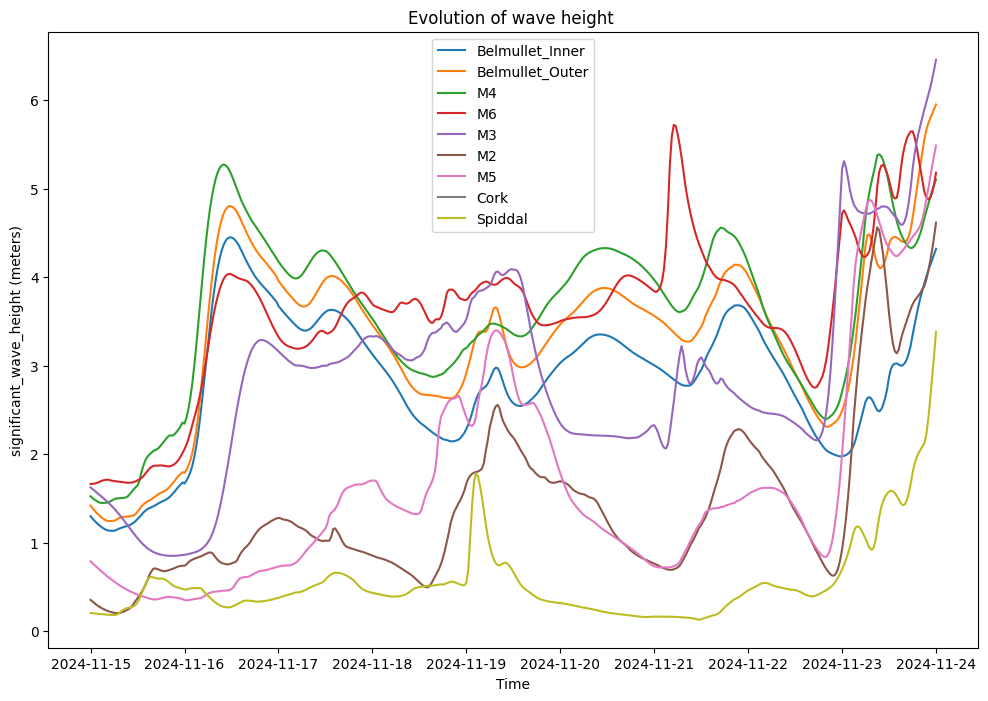

In [34]:
plt.figure(figsize=(12, 8))
color_cyc=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
stations=['Belmullet_Inner','Belmullet_Outer','M4','M6','M3','M2','M5','Cork','Spiddal']
for i,station in enumerate (stations):
    df1=df[df["stationID"]==station]
    plt.plot(df1['time'], df1['significant_wave_height'],label=station,color=color_cyc[i])

plt.xlabel('Time')
plt.ylabel('significant_wave_height (meters)')
plt.title('Evolution of wave height ')
plt.legend()

plt.show()

## Saving the Data as Torch Tensors

group the dataframe by "stationID" and sort each group by "time" to turn it into time-series

In [35]:
station_groups = {station: group.drop("stationID", axis=1).sort_values('time') for station, group in df.groupby('stationID')}
station_groups['Belmullet_Inner'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 433 to 865
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   time                              433 non-null    datetime64[ns, UTC]
 1   longitude                         433 non-null    float64            
 2   latitude                          433 non-null    float64            
 3   significant_wave_height           433 non-null    float64            
 4   mean_wave_period                  433 non-null    float64            
 5   mean_wave_direction               433 non-null    float64            
 6   wave_power_per_unit_crest_length  433 non-null    float64            
 7   peak_period                       433 non-null    float64            
 8   energy_period                     433 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 33.8 KB


In [36]:
def datetime_to_float(d):
    return d.timestamp()

saving the cleaned up data as a torch tensor

**two approaches:**
1. use the time data (separate it out by year, month, etc.) as independent columns
2. group data by the buoy stations and use the data as a time series

In [37]:
tensor_dict = {}
for station, df in station_groups.items():
    time_float = df['time'].apply(datetime_to_float).values
    
    target_tensor = torch.tensor(df['significant_wave_height'].values, dtype=torch.float32)
    data_tensor = torch.tensor(df.drop(columns=['time', 'longitude', 'latitude'], axis=1).values, dtype=torch.float32)
    
    tensor_dict[station] = {
        "features": data_tensor,
        "target": target_tensor
    }

torch.save(tensor_dict, f'{root_path}/data/pt/waves.pt')

test loading the data back in from .pt as tensors

In [38]:
loaded_data = torch.load(f'{root_path}/data/pt/waves.pt')

for station, data in loaded_data.items():
    print(station)
    print(data['features'].shape)
    print(data['target'].shape)
    print()

Ballybunnion
torch.Size([433, 6])
torch.Size([433])

Belmullet_Inner
torch.Size([433, 6])
torch.Size([433])

Belmullet_Outer
torch.Size([433, 6])
torch.Size([433])

Brandon_Bay
torch.Size([433, 6])
torch.Size([433])

Cork_SmartBuoy
torch.Size([433, 6])
torch.Size([433])

Finnis
torch.Size([433, 6])
torch.Size([433])

Killard
torch.Size([433, 6])
torch.Size([433])

M2
torch.Size([433, 6])
torch.Size([433])

M3
torch.Size([433, 6])
torch.Size([433])

M4
torch.Size([433, 6])
torch.Size([433])

M5
torch.Size([433, 6])
torch.Size([433])

M6
torch.Size([433, 6])
torch.Size([433])

Mace_Head
torch.Size([433, 6])
torch.Size([433])

South_Hunter
torch.Size([433, 6])
torch.Size([433])

Spiddal
torch.Size([433, 6])
torch.Size([433])

Splaugh
torch.Size([433, 6])
torch.Size([433])



/var/folders/d0/7p4xxyy97qbb5_f74yjfh9vw0000gp/T/ipykernel_57012/3173438368.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(f'{root_path}/data/p